In [27]:
#Task 1
import numpy as np

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

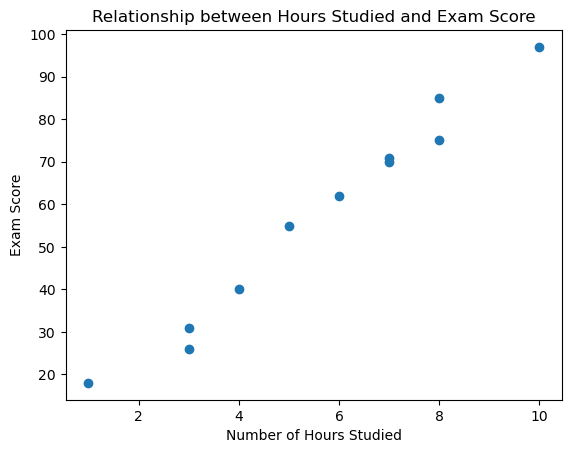

In [28]:
#Task 2
import numpy as np
import matplotlib.pyplot as plt

num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

plt.scatter(num_hours_studied, exam_score)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Exam Score')
plt.title('Relationship between Hours Studied and Exam Score')
plt.show()


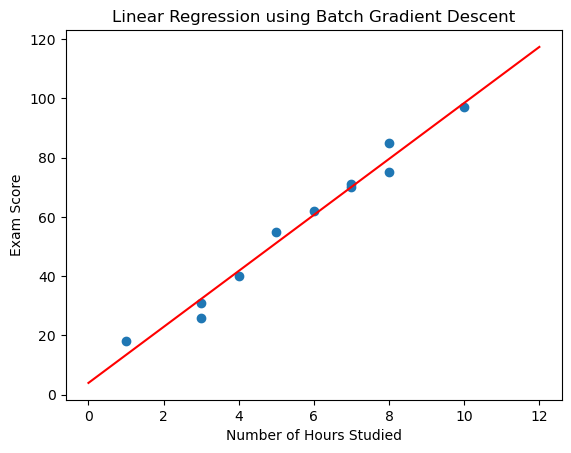

Learned theta: [3.91039028 9.45653142]


In [29]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt

# Data
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Preprocessing: add a column of ones to X for the intercept term
X = np.column_stack((np.ones(len(num_hours_studied)), num_hours_studied))
y = exam_score

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        theta -= (learning_rate / m) * (X.T @ errors)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Initialize theta with random values
theta = np.random.randn(2)

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

# Plot the results
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('Number of Hours Studied')
plt.ylabel('Exam Score')
plt.title('Linear Regression using Batch Gradient Descent')

# Plot the linear regression line
x_line = np.linspace(0, 12, 100)
y_line = theta[0] + theta[1] * x_line
plt.plot(x_line, y_line, color='r')

plt.show()

# Report the learned theta
print('Learned theta:', theta)

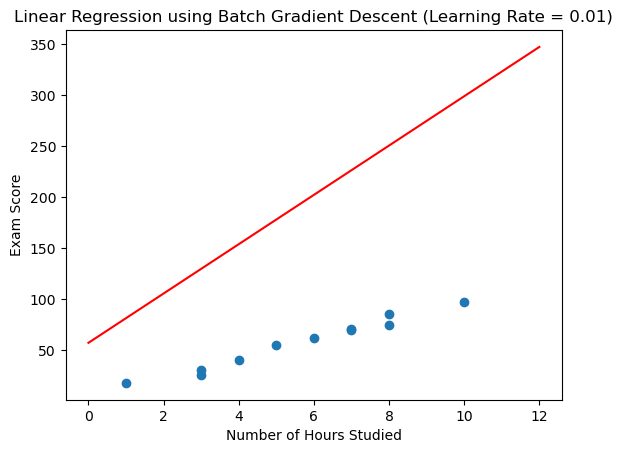

Learned theta (Learning Rate = 0.01): [57.27031348 24.14473047]



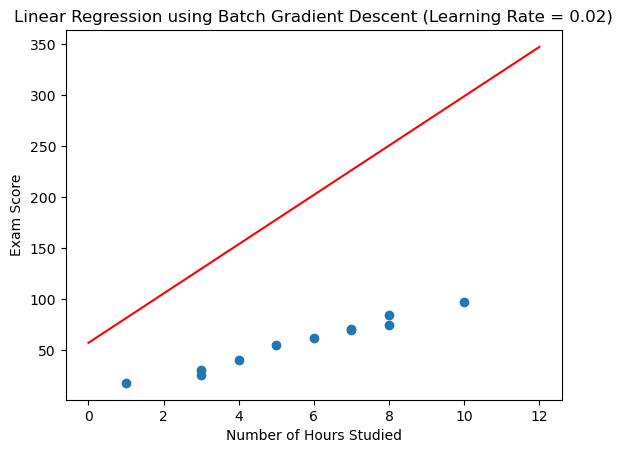

Learned theta (Learning Rate = 0.02): [57.27272718 24.1457564 ]



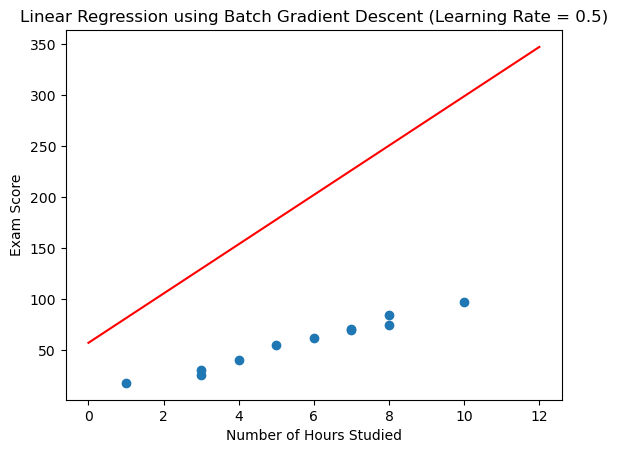

Learned theta (Learning Rate = 0.5): [57.27272727 24.14575644]



In [30]:
#Task 4
import numpy as np
import matplotlib.pyplot as plt

# Data
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Preprocessing: add a column of ones to X for the intercept term
X = np.column_stack((np.ones(len(num_hours_studied)), num_hours_studied))
y = exam_score

# Feature Scaling
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])

# Hyperparameters
learning_rates = [0.01, 0.02, 0.5]
num_iterations = 1000

# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        theta -= (learning_rate / m) * (X.T @ errors)
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Plotting function
def plot_results(theta, learning_rate):
    plt.scatter(num_hours_studied, exam_score)
    plt.xlabel('Number of Hours Studied')
    plt.ylabel('Exam Score')
    plt.title(f'Linear Regression using Batch Gradient Descent (Learning Rate = {learning_rate})')

    # Plot the linear regression line
    x_line = np.linspace(0, 12, 100)
    x_scaled = (x_line - np.mean(X[:, 1])) / np.std(X[:, 1])
    y_line = theta[0] + theta[1] * x_scaled
    plt.plot(x_line, y_line, color='r')

    plt.show()

# Fit linear regression with different learning rates
for learning_rate in learning_rates:
    # Initialize theta with random values
    theta = np.random.randn(2)

    # Perform gradient descent
    theta, cost_history = gradient_descent(X, y, theta, learning_rate, num_iterations)

    # Plot the results
    plot_results(theta, learning_rate)

    # Report the learned theta
    print(f'Learned theta (Learning Rate = {learning_rate}):', theta)
    print()


In [31]:
#Task 5
import numpy as np

# Data
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Preprocessing: add a column of ones to X for the intercept term
X = np.column_stack((np.ones(len(num_hours_studied)), num_hours_studied))
y = exam_score

# Normalize the data
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])

# Hyperparameters
learning_rate = 0.01
num_iterations_list = [10, 100, 1000]

# Function to compute the cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to perform gradient descent with convergence criterion
def gradient_descent(X, y, theta, learning_rate, num_iterations, convergence_threshold):
    m = len(y)
    prev_cost = float('inf')
    for i in range(num_iterations):
        predictions = X @ theta
        errors = predictions - y
        theta -= (learning_rate / m) * (X.T @ errors)

        # Compute cost and check convergence
        cost = compute_cost(X, y, theta)
        if abs(cost - prev_cost) < convergence_threshold:
            print(f'Converged after {i+1} iterations')
            break
        prev_cost = cost
    return theta

# Fit linear regression with different numbers of iterations
for num_iterations in num_iterations_list:
    # Initialize theta with random values
    theta = np.random.randn(2)

    # Perform gradient descent with convergence criterion
    theta = gradient_descent(X, y, theta, learning_rate, num_iterations, convergence_threshold=1e-6)

    # Report the learned theta
    print(f'Learned theta (Iterations = {num_iterations}):', theta)
    print()


Learned theta (Iterations = 10): [4.43256525 3.09545805]

Learned theta (Iterations = 100): [36.61156094 14.968145  ]

Converged after 867 iterations
Learned theta (Iterations = 1000): [57.26360308 24.14187394]

